## Part 2: Analyzing Click Through Rate

_**Please submit your final code in**_ `individual.py`

We will use hypothesis testing to analyze **Click Through Rate (CTR)** on the New York Times website.
CTR is defined as the number of clicks a user makes per impression that is made upon the user.
We are going to determine if there is statistically significant difference between the mean CTR for
the following groups:
```
1. Signed in users v.s. Not signed in users
2. Male v.s. Female
3. Each of 7 age groups against each other (7 choose 2 = 21 tests)
```

1. Calculate the adjustment needed to account for multiple testing at the 0.05 significance level.  



In [24]:
alpha = .05 / 2

2 - Load `data/nyt1.csv` in a pandas dataframe.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv('data/nyt1.csv')
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [23]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


Use `data.info()` to make sure the data types are valid and there are no null values.
This data has been cleaned for you, but generally it is good practice to check for those.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


3 - Make a new column `CTR` using the `Impressions` and the `Clicks` columns.  Remember to remove the rows with `0` impressions.

In [13]:
df_new = df.query('Impressions > 0')
df_new['CTR'] = df_new['Clicks'] / df_new['Impressions'] 
df_new.head(10)

/Users/andytooke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0.000000
1,73,1,3,0,1,0.000000
2,30,0,3,0,1,0.000000
3,49,1,3,0,1,0.000000
4,47,1,11,0,1,0.000000
5,47,0,11,1,1,0.090909
6,0,0,7,1,0,0.142857
7,46,0,5,0,1,0.000000
8,16,0,3,0,1,0.000000
9,52,0,4,0,1,0.000000


4 - Plot the distribution of each column in the dataframe. Do that using `data.hist()`.
   Check out the arguments you can use with the function
   [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).
   Set the `figsize=(12,5)` to make sure the graph is readable.

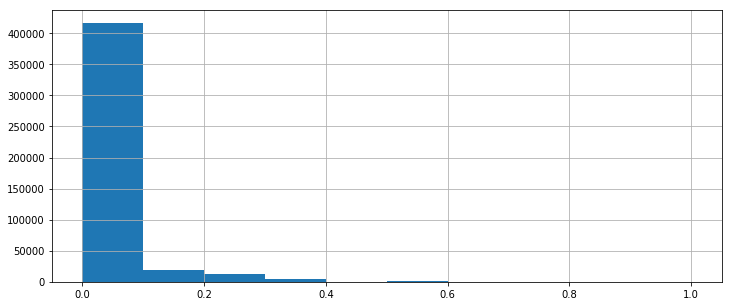

In [16]:
df_new['CTR'].hist(figsize=(12,5))

5 - Make 2 dataframes - one a dataframe of 'users who are signed in' and a second of 'users who are not signed in'.
   Plot the distributions of the columns in each of the dataframes. By visually inspecting
   the two sets of distributions, describe the differences between users who are signed in and not
   signed in?

In [34]:
signed_in_df = df_new.query('Signed_In == 1')
signed_out_df = df_new.query('Signed_In == 0')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114a89390>,
      dtype=object)

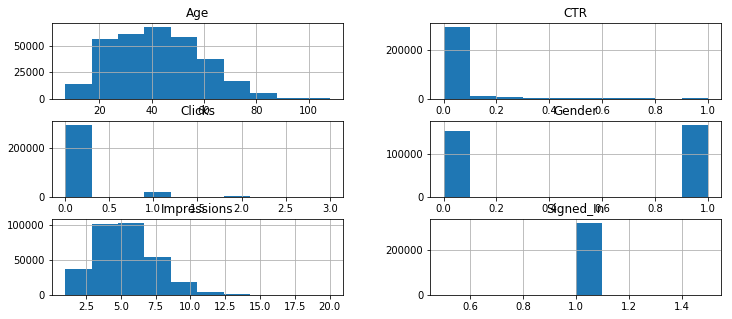

In [35]:
signed_in_df.hist(figsize=(12,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129811b00>,
      dtype=object)

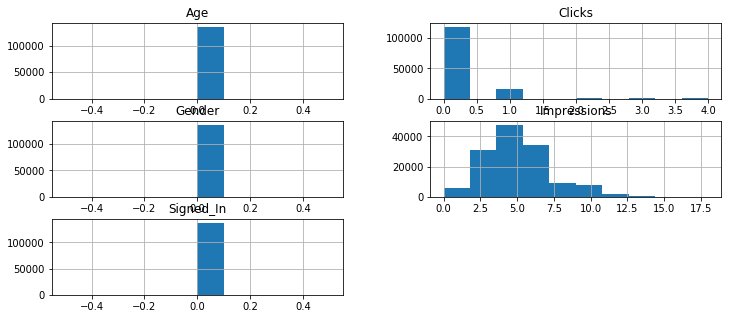

In [22]:
signed_out_df.hist(figsize=(12,5))

6 - Use a Welch's t-test to determine if the mean CTR between the signed-in users
   and the non-signed-in users is statistically different. Explain how you
   arrive at your conclusion.
   
      The Welch's t-test, unlike Student's t-test, does *not* assume the two
   populations from which the samples are drawn have the same variance.

   ```python
   scipy.stats.ttest_ind(a, b, equal_var=False)


In [41]:
import scipy.stats as scs
t_test = scipy.stats.ttest_ind(signed_in_df['CTR'],
                               signed_out_df['CTR'],
                               equal_var =False
                              )
t_test

Ttest_indResult(statistic=-55.37611793426087, pvalue=0.0)

In [49]:
in_mean = np.mean(signed_in_df['CTR'])
out_mean = np.mean(signed_out_df['CTR'])
std_in = np.std(signed_in_df['CTR'], ddof=1)
std_out = np.std(signed_out_df['CTR'], ddof=1)
n_in = len(signed_in_df['CTR'])
n_out = len(signed_out_df['CTR'])
t = (in_mean - out_mean) / (np.sqrt((std_in**2/n_in) + (std_out**2/n_out)))
alpha = 0.05
n_mean = (n_in + n_out) // 2
t_val = scs.t.ppf(1 - alpha, n_mean-1 )
print(t)
print(t_val)
print(in_mean)
print(out_mean)

-55.376117934274596
1.64486031939363
0.01425363523213594
0.028354907061657893


7 - Determine if the mean CTR between male users and female users is
   statistically different. Use only the rows where the users are signed in. 
   Is the difference in mean CTR between signed-in users
   and non-signed-in users more worthy of further investigation than that between
   male and female? Explain your answer. `Male: 1, Female: 0`

In [47]:
male = signed_in_df.query('Gender == 1')
female = signed_in_df.query('Gender == 0')

t_test = scipy.stats.ttest_ind(male['CTR'],
                               female['CTR'],
                               equal_var =False
                              )
t_test


Ttest_indResult(statistic=-3.289756065935106, pvalue=0.0010028527313147612)

In [59]:
signed_in_df['age_group'] = pd.cut(signed_in_df['Age'], [7,18,24,34,44,54,65,74,84,94,104,114])
signed_in_df

/Users/andytooke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,Gender,Impressions,Clicks,Signed_In,CTR,age_group
0,36,0,3,0,1,0.000000,"(34, 44]"
1,73,1,3,0,1,0.000000,"(65, 74]"
2,30,0,3,0,1,0.000000,"(24, 34]"
3,49,1,3,0,1,0.000000,"(44, 54]"
4,47,1,11,0,1,0.000000,"(44, 54]"
5,47,0,11,1,1,0.090909,"(44, 54]"
7,46,0,5,0,1,0.000000,"(44, 54]"
8,16,0,3,0,1,0.000000,"(7, 18]"
9,52,0,4,0,1,0.000000,"(44, 54]"
11,21,0,3,0,1,0.000000,"(18, 24]"


In [53]:

8. Calculate a new column called AgeGroup, which bins Age into the following buckets
   `'(18, 24]', '(24, 34]', '(34, 44]', '(44, 54]', '(54, 64]', '(64, 1000]', '(7, 18]' 

    
   Use only the rows where the users are signed in. The non-signed in users
   all have age 0, which indicates the data is not available.

   Use pandas' [cut](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) function.
   `pandas.cut(signin_data['Age'], [7, 18, 24, 34, 44, 54, 64, 1000])`

9. Determine the pairs of age groups where the difference in mean CTR is
   statistically significant. Collect the p-values and the difference of the
   means for each pair.  Store these results in a `DataFrame`.

   Rank (in descending order) the difference in mean CTR for the pairs that are statistically significant.
   Comment on the trend you observe for groups `(64, 1000]`, `(54, 64]` and `(7, 18]`.
   Feel free to include additional trends you observe.

   Rank (in ascending order) the difference in mean CTR for the pairs that
   are _statistically insignificant_. State the 3 groups that are the least
   different in mean CTR and provide an explanation for why you think this is true.

SyntaxError: invalid syntax (<ipython-input-53-603e3c65fdaa>, line 2)